In [110]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


In [128]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [111]:
df_raw = pd.read_csv("dataset.csv",skiprows=1)
df_raw

,record,B (m),q (kPa),N,L/B,Df /B,Sm (mm),Sp (mm)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1*,60.0,385.00,47.0,1.00,0.09,40.0,30.1
2,2*,0.8,78.00,15.0,1.00,0.00,7.0,11.2
3,3,2.1,697.00,50.0,1.00,0.71,2.3,7.5
4,4,14.0,18.32,15.0,1.61,0.18,4.2,19.1
...,...,...,...,...,...,...,...,...
185,185,14.5,74.00,6.0,4.40,0.07,74.0,90.7
186,186,25.5,175.00,21.0,1.00,0.10,25.0,37.3
187,187,1.0,284.00,25.0,2.20,3.00,10.5,6.4
188,188,17.2,34.00,17.0,2.50,0.27,3.6,19.1


In [112]:

df_raw = pd.read_csv("dataset.csv",skiprows=1)

#rename columns
df_raw = df_raw.drop(0)
df_raw = df_raw.drop('record',axis = 1)
df_raw.rename(columns={'B (m)':'B','q (kPa)':'q','Sm (mm)':'sm','Sp (mm)':'sp'},inplace = True)
#drop unnecessary  rows/columns
#print(df_raw.drop(df_raw.columns[8],axis = 1))


In [160]:
print(df_raw)

        B       q     N   L/B  Df  /B    sm    sp
1    60.0  385.00  47.0  1.00    0.09  40.0  30.1
2     0.8   78.00  15.0  1.00    0.00   7.0  11.2
3     2.1  697.00  50.0  1.00    0.71   2.3   7.5
4    14.0   18.32  15.0  1.61    0.18   4.2  19.1
5     2.5  284.00  60.0  3.80    1.20   1.0   6.7
..    ...     ...   ...   ...     ...   ...   ...
185  14.5   74.00   6.0  4.40    0.07  74.0  90.7
186  25.5  175.00  21.0  1.00    0.10  25.0  37.3
187   1.0  284.00  25.0  2.20    3.00  10.5   6.4
188  17.2   34.00  17.0  2.50    0.27   3.6  19.1
189  18.3   41.00  20.0  1.00    0.02   4.8  17.2

[189 rows x 7 columns]


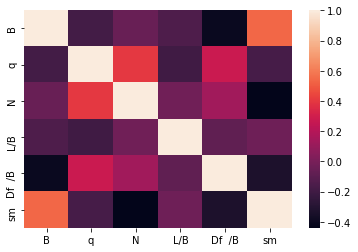

In [164]:
sns.heatmap(df_raw[df_raw.columns[0:-1]].corr())

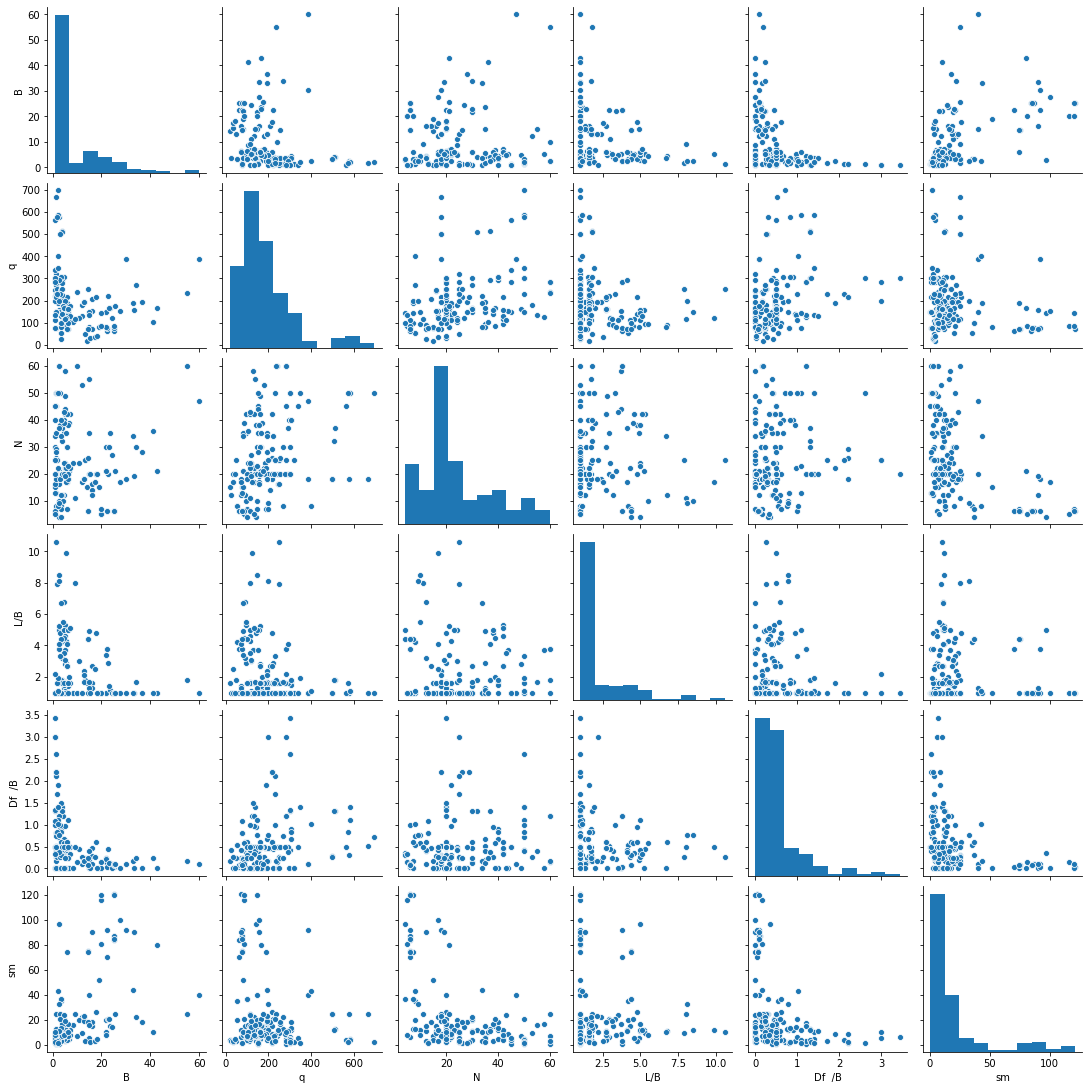

In [159]:
#Pairwise scatter plots to check for multicollinearity
sns.pairplot(df_raw[df_raw.columns[0:-1]])

# Spliting Dataset

In [115]:
xx = [0,1,2,3,4]
yy = [5]
X = df_raw.iloc[:,xx]
y = df_raw.iloc[:,yy]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# Linear Regression


In [116]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
#fit model
reg.fit(X_train,y_train)
reg_pred = reg.predict(X_test)


In [129]:
def accuracy (test, pred):
    r2 = r2_score(test,pred)
    rmse= sqrt(mean_squared_error(test,pred))
    mae = mean_absolute_error(test,pred)
    val = f'R2: {r2:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}'
    return val

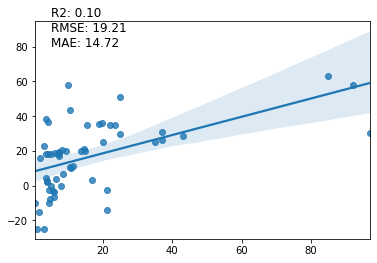

In [118]:
plt.text(5,80,accuracy(y_test,reg_pred),fontsize= 12)
sns.regplot(x= y_test.values.flatten(),y = reg_pred.reshape(-1))

# Tree Regressor

In [119]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
tree_pred = regressor.predict(X_test)

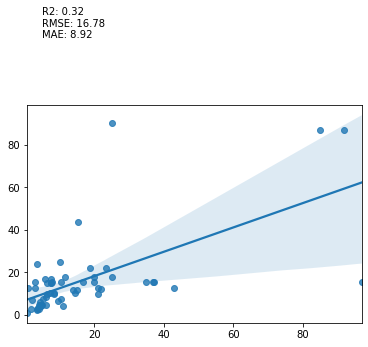

In [120]:
plt.text(5,130,accuracy(y_test,tree_pred))
sns.regplot(x= y_test.values.flatten(),y= tree_pred.reshape(-1))

# Random Forest

In [121]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train.values.flatten())
rfr_pred = rfr.predict(X_test)

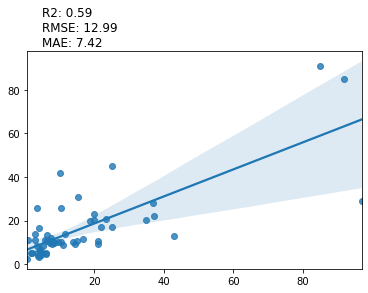

In [122]:
plt.text(5,100,accuracy(y_test,rfr_pred), fontsize= 12)
sns.regplot(x= y_test.values.flatten(),y= rfr_pred.reshape(-1))

# CNN

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
cnn = Sequential()

cnn.add(Dense(19,activation='relu'))
cnn.add(Dense(19,activation='relu'))
cnn.add(Dense(19,activation='relu'))
cnn.add(Dense(19,activation='relu'))
cnn.add(Dense(1))

cnn.compile(optimizer='adam',loss='mse')

In [124]:
cnn.fit(x=X_train.values,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=200,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 355ms/step - loss: 3978.6135 - val_loss: 2410.9778
Epoch 2/500
1/1 [==============================] - 0s 16ms/step - loss: 3710.5293 - val_loss: 2222.2183
Epoch 3/500
1/1 [==============================] - 0s 17ms/step - loss: 3461.5117 - val_loss: 2046.3217
Epoch 4/500
1/1 [==============================] - 0s 16ms/step - loss: 3227.5710 - val_loss: 1883.2347
Epoch 5/500
1/1 [==============================] - 0s 17ms/step - loss: 3010.3042 - val_loss: 1733.3176
Epoch 6/500
1/1 [==============================] - 0s 15ms/step - loss: 2809.6960 - val_loss: 1598.2781
Epoch 7/500
1/1 [==============================] - 0s 16ms/step - loss: 2628.1865 - val_loss: 1478.2910
Epoch 8/500
1/1 [==============================] - 0s 18ms/step - loss: 2464.8953 - val_loss: 1370.5054
Epoch 9/500
1/1 [==============================] - 0s 17ms/step - loss: 2316.0193 - val_loss: 1273.0439
Epoch 10/500
1/1 [==============================] - 0s 16ms/ste

1/1 [==============================] - 0s 18ms/step - loss: 850.8942 - val_loss: 462.3130
Epoch 81/500
1/1 [==============================] - 0s 16ms/step - loss: 846.4390 - val_loss: 460.4805
Epoch 82/500
1/1 [==============================] - 0s 16ms/step - loss: 841.8578 - val_loss: 458.7502
Epoch 83/500
1/1 [==============================] - 0s 18ms/step - loss: 837.1183 - val_loss: 457.0050
Epoch 84/500
1/1 [==============================] - 0s 16ms/step - loss: 832.2095 - val_loss: 455.2208
Epoch 85/500
1/1 [==============================] - 0s 16ms/step - loss: 827.0688 - val_loss: 453.3824
Epoch 86/500
1/1 [==============================] - 0s 15ms/step - loss: 821.7191 - val_loss: 451.4577
Epoch 87/500
1/1 [==============================] - 0s 17ms/step - loss: 816.0835 - val_loss: 449.3807
Epoch 88/500
1/1 [==============================] - 0s 15ms/step - loss: 810.1783 - val_loss: 447.1943
Epoch 89/500
1/1 [==============================] - 0s 16ms/step - loss: 804.4685 - va

1/1 [==============================] - 0s 17ms/step - loss: 395.2528 - val_loss: 299.5835
Epoch 160/500
1/1 [==============================] - 0s 15ms/step - loss: 388.4073 - val_loss: 297.5486
Epoch 161/500
1/1 [==============================] - 0s 15ms/step - loss: 381.5981 - val_loss: 295.5630
Epoch 162/500
1/1 [==============================] - 0s 16ms/step - loss: 374.3484 - val_loss: 294.0282
Epoch 163/500
1/1 [==============================] - 0s 15ms/step - loss: 367.0931 - val_loss: 293.5352
Epoch 164/500
1/1 [==============================] - 0s 17ms/step - loss: 359.2961 - val_loss: 294.0199
Epoch 165/500
1/1 [==============================] - 0s 17ms/step - loss: 350.5440 - val_loss: 295.1496
Epoch 166/500
1/1 [==============================] - 0s 15ms/step - loss: 342.1794 - val_loss: 296.8300
Epoch 167/500
1/1 [==============================] - 0s 18ms/step - loss: 334.4695 - val_loss: 298.6577
Epoch 168/500
1/1 [==============================] - 0s 16ms/step - loss: 327.

Epoch 238/500
1/1 [==============================] - 0s 14ms/step - loss: 169.6642 - val_loss: 199.3321
Epoch 239/500
1/1 [==============================] - 0s 18ms/step - loss: 168.9984 - val_loss: 198.4047
Epoch 240/500
1/1 [==============================] - 0s 15ms/step - loss: 168.2870 - val_loss: 197.8795
Epoch 241/500
1/1 [==============================] - 0s 15ms/step - loss: 167.8129 - val_loss: 197.0474
Epoch 242/500
1/1 [==============================] - 0s 17ms/step - loss: 167.2454 - val_loss: 196.1244
Epoch 243/500
1/1 [==============================] - 0s 20ms/step - loss: 166.9951 - val_loss: 195.9796
Epoch 244/500
1/1 [==============================] - 0s 17ms/step - loss: 166.3650 - val_loss: 195.9561
Epoch 245/500
1/1 [==============================] - 0s 15ms/step - loss: 165.8950 - val_loss: 194.1028
Epoch 246/500
1/1 [==============================] - 0s 17ms/step - loss: 165.2453 - val_loss: 192.9274
Epoch 247/500
1/1 [==============================] - 0s 17ms/ste

Epoch 317/500
1/1 [==============================] - 0s 17ms/step - loss: 143.8072 - val_loss: 168.0341
Epoch 318/500
1/1 [==============================] - 0s 16ms/step - loss: 143.6383 - val_loss: 168.1264
Epoch 319/500
1/1 [==============================] - 0s 17ms/step - loss: 143.3715 - val_loss: 167.9296
Epoch 320/500
1/1 [==============================] - 0s 16ms/step - loss: 143.1714 - val_loss: 166.9666
Epoch 321/500
1/1 [==============================] - 0s 17ms/step - loss: 142.9023 - val_loss: 167.0185
Epoch 322/500
1/1 [==============================] - 0s 16ms/step - loss: 142.6664 - val_loss: 167.1043
Epoch 323/500
1/1 [==============================] - 0s 16ms/step - loss: 142.4363 - val_loss: 166.4720
Epoch 324/500
1/1 [==============================] - 0s 16ms/step - loss: 142.2460 - val_loss: 165.9017
Epoch 325/500
1/1 [==============================] - 0s 17ms/step - loss: 142.0005 - val_loss: 166.0211
Epoch 326/500
1/1 [==============================] - 0s 16ms/ste

Epoch 396/500
1/1 [==============================] - 0s 16ms/step - loss: 127.3316 - val_loss: 146.3797
Epoch 397/500
1/1 [==============================] - 0s 17ms/step - loss: 127.1510 - val_loss: 146.7588
Epoch 398/500
1/1 [==============================] - 0s 17ms/step - loss: 126.8954 - val_loss: 146.2227
Epoch 399/500
1/1 [==============================] - 0s 17ms/step - loss: 127.0616 - val_loss: 144.9353
Epoch 400/500
1/1 [==============================] - 0s 15ms/step - loss: 126.8927 - val_loss: 144.3280
Epoch 401/500
1/1 [==============================] - 0s 16ms/step - loss: 126.6492 - val_loss: 145.0576
Epoch 402/500
1/1 [==============================] - 0s 16ms/step - loss: 126.5153 - val_loss: 146.5732
Epoch 403/500
1/1 [==============================] - 0s 16ms/step - loss: 126.5698 - val_loss: 146.3769
Epoch 404/500
1/1 [==============================] - 0s 16ms/step - loss: 126.3906 - val_loss: 144.4430
Epoch 405/500
1/1 [==============================] - 0s 17ms/ste

Epoch 475/500
1/1 [==============================] - 0s 18ms/step - loss: 118.7850 - val_loss: 132.5087
Epoch 476/500
1/1 [==============================] - 0s 17ms/step - loss: 118.4184 - val_loss: 131.7140
Epoch 477/500
1/1 [==============================] - 0s 17ms/step - loss: 117.7483 - val_loss: 132.0323
Epoch 478/500
1/1 [==============================] - 0s 17ms/step - loss: 117.0296 - val_loss: 132.3937
Epoch 479/500
1/1 [==============================] - 0s 17ms/step - loss: 116.7193 - val_loss: 131.3800
Epoch 480/500
1/1 [==============================] - 0s 18ms/step - loss: 116.6462 - val_loss: 129.4314
Epoch 481/500
1/1 [==============================] - 0s 6ms/step - loss: 116.8623 - val_loss: 128.8286
Epoch 482/500
1/1 [==============================] - 0s 16ms/step - loss: 117.1785 - val_loss: 129.9953
Epoch 483/500
1/1 [==============================] - 0s 16ms/step - loss: 116.4854 - val_loss: 131.9035
Epoch 484/500
1/1 [==============================] - 0s 18ms/step

In [125]:
cnn_pred = cnn.predict(X_test)

In [126]:
accuracy(y_test,cnn_pred)

'R2: 0.68\nRMSE: 11.47\nMAE: 6.47'

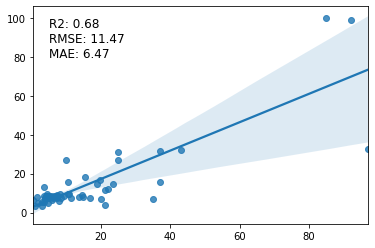

In [127]:
plt.text(5,80,accuracy(y_test,cnn_pred),fontsize= 12)
sns.regplot(x= y_test.values.flatten(),y= cnn_pred.reshape(-1))